<a href="https://colab.research.google.com/github/rstager/ARoboCar/blob/master/pytorch_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


East Bay Machine Learning pytorch tutorial series.

---

We will use this notebook as the launch point for our pytorch tutorial series.


We willl used a google doc as a shared online clipboard. 
https://docs.google.com/document/d/1N-5Ue0rk7g8CImayet-cgnaCkHJzXky7aeHrwUocXEM/edit?usp=sharing


# Setkup the environment

In [2]:
!pip install torchviz

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=553daf6d30b777c2d51eeb2927e4f44b6fac4fcfb8855df895e4cd6cca2e8d18
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
from __future__ import print_function
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from torchviz import make_dot
import copy
from IPython.core.debugger import set_trace
import math


#ENABLE GPU
To enable GPU hardware accelerator, just go to Runtime -> Change runtime type -> Hardware accelerator -> GPU

In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    x = torch.empty(5, 3)
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))
else:
  print("Cuda not available.")

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


# Benchmarks
Let's compare execution times for numpy, torch cpu and torch gpu

First setup a convenience function.

In [0]:
import timeit
import copy
from functools import partial

def benchmark(stmt,*args):
  number=100
  print("Numpy time   {:.6f}s".format(timeit.timeit(partial(stmt,np,*args),number=1000)/number))
  targs=[torch.tensor(arg) for arg in args]
  print("pytorch time {:.6f}s".format(timeit.timeit(partial(stmt,torch,*targs),number=1000)/number))
  targs=[arg.to(torch.device('cuda')) for arg in targs]
  print("gpu time     {:.6f}s".format(timeit.timeit(partial(stmt,torch,*targs),number=1000)/number))


Next write a simple function to be benchmarked for all three types of variables. Notice that the module name 'np' as the first argument will be replaced with 'torch' for the torch benchmarks. The remaining arguments are expected to be numpy tensors and will be converted to torch tensors for the second benchmark and moved to the gpu for the third benchmark.



In [0]:
def stmt(np,a,b):
  a=np.sin(a)
  b=np.sqrt(b)
  c=a+b


a=np.zeros((300,500))
b=np.zeros((300,500))

benchmark(stmt,a,b)


Numpy time   0.013756s
pytorch time 0.019999s
gpu time     0.000848s


# Plotting with matplotlib


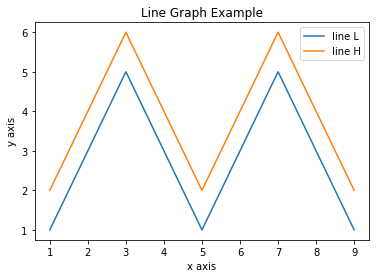

In [96]:
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

# Graph vizualization

In [0]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=8b9b8c1f4098d188de1aa696be42ed382bbfb62ccf34920a301964b2265a6321
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


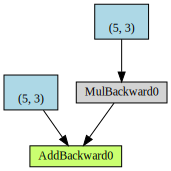

In [0]:
from torchviz import make_dot

x = torch.empty(5, 3,requires_grad=True)
y = torch.empty(5, 3,requires_grad=True)
z = x + y * 10
make_dot(z)


# Gradient descent linear regresion example

In [0]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

device = 'cpu' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

Now define gradient descent

In [174]:
def model(x):
  return model.a+model.b*x
model.a=torch.randn(1)
model.b=torch.randn(1)

print(vars(model))

{'a': tensor([2.2117]), 'b': tensor([-0.4630])}


In [176]:
lr = 1e-1
n_epochs = 1000

def initialize_parameters(model):
  for name,param in vars(model).items():
    setattr(model,name,torch.randn(param.shape, requires_grad=True, dtype=torch.float,device=device))

# define SGD optimization

def single_step(model,x_tensor,y_tensor,hook=None):
  yhat = model(x_tensor)
  error = y_tensor - yhat
  loss = (error ** 2).mean()
  
  # We just tell PyTorch to work its way BACKWARDS from the specified loss!
  loss.backward()

  # UPDATING the parameters 
  # We need to use NO_GRAD to keep the update out of the gradient computation

  with torch.no_grad():
    for param in vars(model).values():
      param -= lr * param.grad
      param.grad.zero_()

def gd(model,x_train_tensor,y_train_tensor):
  initialize_parameters(model)

  for epoch in range(n_epochs): 
    single_step(model,x_train_tensor,y_train_tensor)

# now test it
gd(model,x_train_tensor,y_train_tensor)
print(vars(model))

{'a': tensor([1.0235], requires_grad=True), 'b': tensor([1.9690], requires_grad=True)}


In [172]:
class Model:
  def __init__(self):
    self.a=torch.randn(1)
    self.b=torch.randn(1)

  def __call__(self,x):
    return self.a+self.b*x

model=Model()

tensor([-2.0440])


# visualizing GD

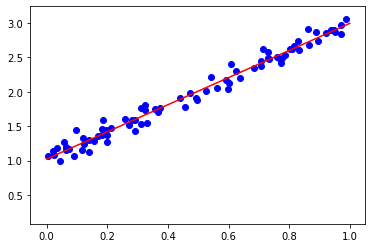

In [198]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
movie=True

def gd(model,x_train_tensor,y_train_tensor,hook=lambda m,x,y:None):
  initialize_parameters(model)
  for epoch in range(n_epochs): 
    single_step(model,x_train_tensor,y_train_tensor)
    hook(model,x_train_tensor,y_train_tensor)

def plot_hook(model,x_tensor,y_tensor,final=False):
  scat=plt.scatter(x_train_tensor,y_train_tensor,c='b')
  l1,=plt.plot(list(rng),list(model(rng)),c='r')
  artists.append([scat,l1]) 

gd(model,x_train_tensor,y_train_tensor,hook=plot_hook)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 


# Stochastic Gradient Descent

In [206]:
def sgd(model,x_train_tensor,y_train_tensor,batchsize=32,hook=lambda m,x,y:None):
  initialize_parameters(model)
  for epoch in range(n_epochs):
    for batch in range(int(n_epochs/batchsize)+1):
      rows = torch.randperm(x_train.shape[0])[:batchsize]
      single_step(model,x_train_tensor[rows],y_train_tensor[rows])
    hook(model,x_train_tensor,y_train_tensor)

sgd(model,x_train_tensor,y_train_tensor)
print(vars(model))

{'a': tensor(1.0216, requires_grad=True), 'b': tensor(1.9686, requires_grad=True)}


# now lets visualize SGD

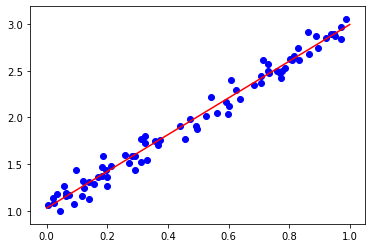

In [207]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
sgd(model,x_train_tensor,y_train_tensor,hook=plot_hook)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# Visualizing the loss function

torch.Size([100, 100]) torch.Size([100, 100]) torch.Size([80, 1]) torch.Size([80, 1]) torch.Size([])


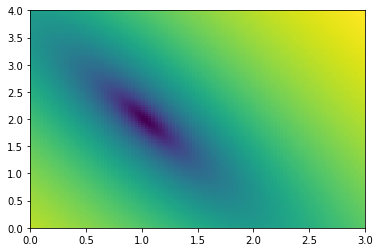

In [186]:
from mpl_toolkits.mplot3d import Axes3D

arng=torch.linspace(0,3,100)
brng=torch.linspace(0,4,100)
av, bv = torch.meshgrid(arng,brng)
def lossf(model,a,b):
    model.a=a
    model.b=b
    yhat = model(x_train_tensor)
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    return loss
loss2d=torch.tensor([math.log(lossf(model,a,b)) for b in brng for a in arng])

print(av.shape,bv.shape,yhat.shape,error.shape,loss.shape)
loss2d=loss2d.reshape(arng.shape[0],brng.shape[0])
plt.pcolor(arng,brng,loss2d)
plt.show()

https://pytorch.org/docs/master/named_tensor.html